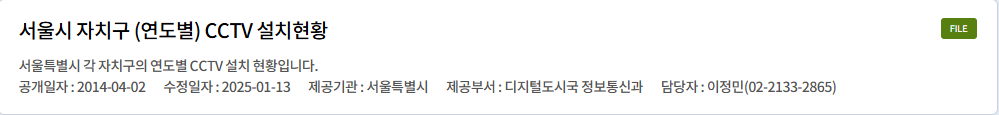
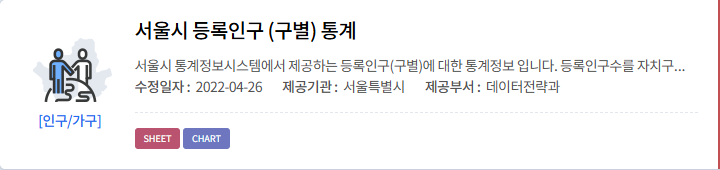
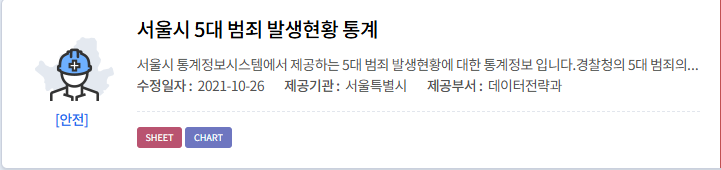

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# # 한글폰트
# plt.rcParams["font.family"] = "Malgun Gothic"
# # - 요소 설정
# plt.rcParams["axes.unicode_minus"] = False
import koreanize_matplotlib

import warnings
warnings.simplefilter("ignore")

In [8]:
cctv_df = pd.read_excel("./resources/cctv.xlsx", skiprows=2, usecols="C:N")
cctv_df

,구분,총 계,2015년 이전 설치된 CCTV,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년,2024년
0,계,113273.0,9702.0,8827.0,10108.0,10594.0,12562.0,11865.0,9358.0,9397.0,13857.0,17003.0
1,종로구,2339.0,146.0,76.0,115.0,137.0,68.0,231.0,86.0,234.0,924.0,322.0
2,중 구,3118.0,356.0,219.0,366.0,385.0,159.0,352.0,416.0,137.0,135.0,593.0
3,용산구,3609.0,24.0,124.0,454.0,119.0,335.0,625.0,431.0,457.0,411.0,629.0
4,성동구,4638.0,1295.0,228.0,881.0,383.0,477.0,386.0,294.0,170.0,320.0,204.0
5,광진구,4636.0,247.0,38.0,660.0,465.0,710.0,194.0,744.0,276.0,348.0,954.0
6,동대문구,3846.0,0.0,1563.0,136.0,197.0,209.0,223.0,197.0,234.0,509.0,578.0
7,중랑구,5392.0,541.0,160.0,182.0,209.0,1070.0,992.0,604.0,346.0,433.0,855.0
8,성북구,4906.0,338.0,394.0,386.0,766.0,667.0,209.0,407.0,363.0,415.0,961.0
9,강북구,3584.0,41.0,195.0,1.0,349.0,938.0,545.0,408.0,652.0,375.0,80.0
